In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def frquency_sample(fs, t):
    ts = 1/fs
    s_t = np.arange(t[0], t[-1], ts)
    return s_t

In [3]:
T, f = 2 * 10**(-6), 10**7
t = np.arange(0, T, 2 * 10**(-9))
y = np.exp(-0.1*f*t) * np.cos(2*np.pi*f*t*np.exp(-0.1*f*t))

fs = 20*(10**6)
s_t = frquency_sample(fs, t)

s_y = np.exp(-0.1*f*s_t) * np.cos(2*np.pi*f*s_t*np.exp(-0.1*f*s_t))

<StemContainer object of 3 artists>

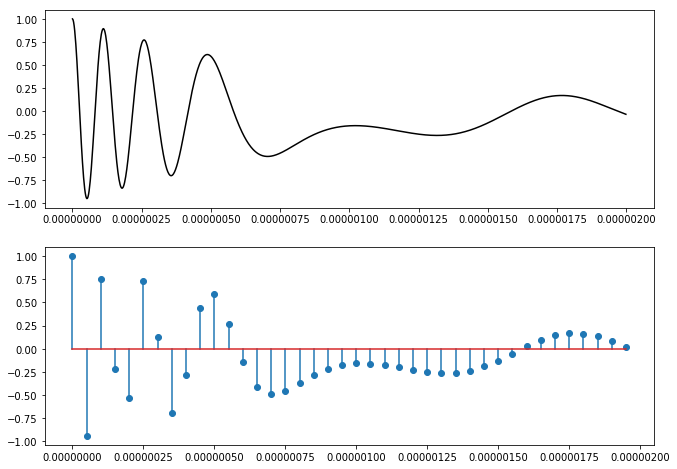

In [4]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(2,2,1)
s_ax = fig.add_subplot(2,2,3)
ax.plot(t,y,'k')
s_ax.stem(s_t,s_y)

In [5]:
def quantize_sample2(Q, y):
    qy = y.copy()
    q = 2**(Q)
    qt = np.linspace(min(qy), max(qy), q)
    
    for i in range(len(qy)):
        m = np.argmin((abs(qt - qy[i])))
        qy[i] = qt[m]
    
    return qy

In [6]:
def quant_error(y, qy):
    err = np.sum(abs(y-qy))
    avr_error = err/len(y)
    
    return avr_error

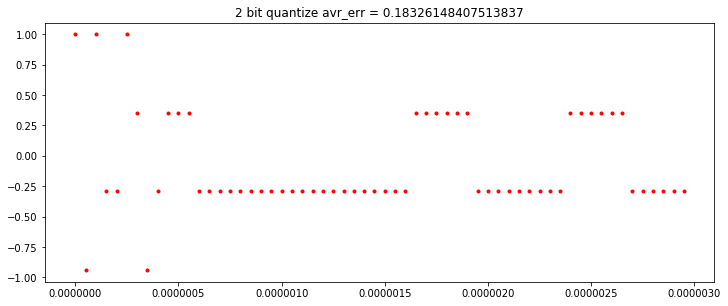

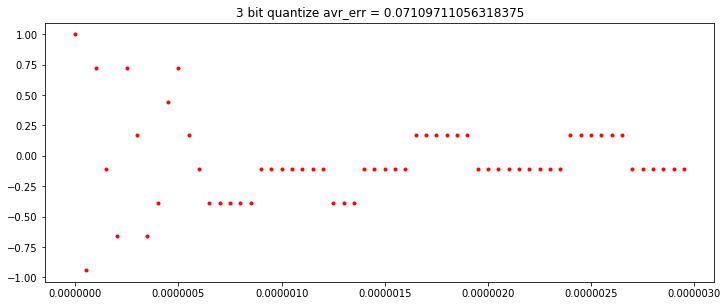

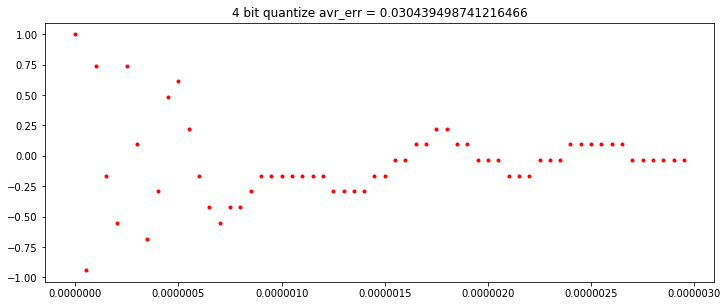

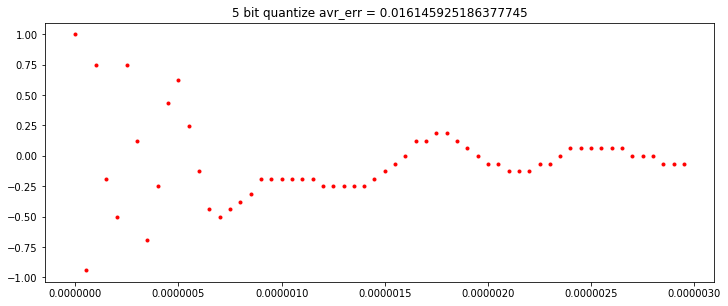

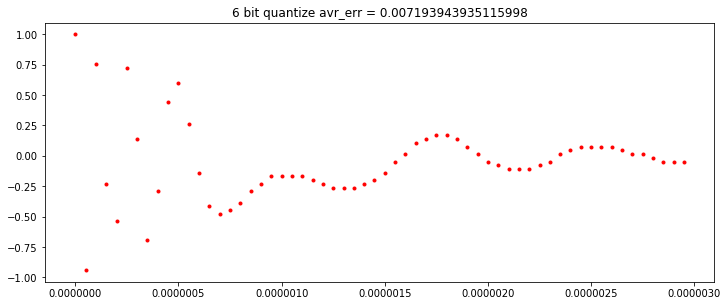

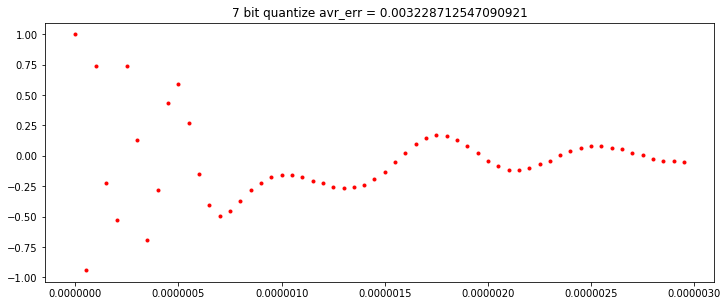

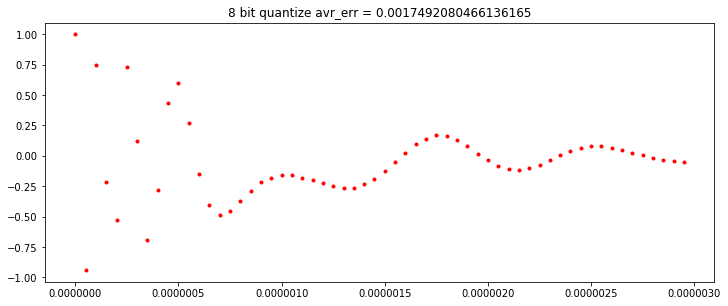

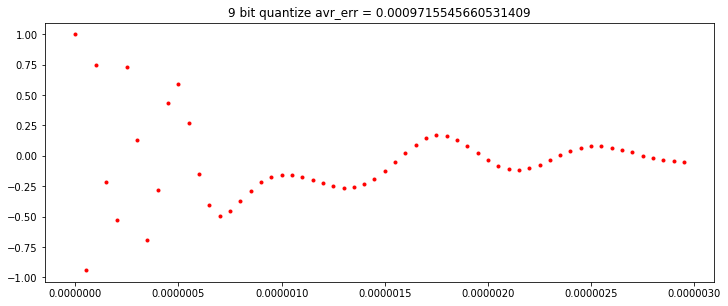

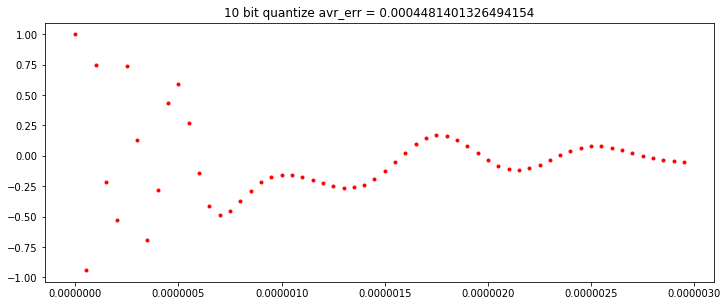

In [7]:
T, f = 3 * 10**(-6), 10**7
t = np.arange(0, T, 2 * 10**(-9))
y = np.exp(-0.1*f*t) * np.cos(2*np.pi*f*t*np.exp(-0.1*f*t))

fs = 20*(10**6)
s_t = frquency_sample(fs, t)
s_y = np.exp(-0.1*f*s_t) * np.cos(2*np.pi*f*s_t*np.exp(-0.1*f*s_t))

total_err = []
et = []
for i in range(2, 11):
    Q = i
    et += [i]
    qy = quantize_sample2(Q, s_y)
    
    avr_error = quant_error(s_y, qy)
    
    total_err += [avr_error]
    txt = str(i)+" bit quantize "+'avr_err = '+str(avr_error)
    
    fig = plt.figure(figsize=(12, 62))
    ax = fig.add_subplot(11,1,i+1, title=txt)
    ax.plot(s_t,qy,'r.')

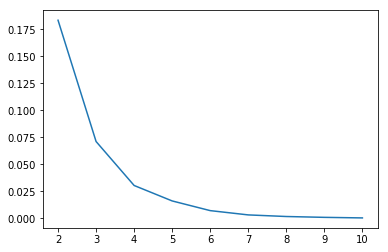

In [8]:
plt.plot(et, total_err)

In [9]:
import random as r

In [10]:
def bitation(Q):
    q = 2**(Q)
    bt = []
    for i in range(q):
        h = bin(i)[2:]
        while(len(h)!=Q):
            h = '0' + h
        bt+=[h]
    return bt

In [11]:
bitation(4)

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

In [12]:
def Binarization(m, Q):
    h = bin(m)[2:]
    while(len(h)!=Q):
        h = '0' + h
    return h

In [13]:
def Err_maker(h, bp):
    r_ent = ''
    for i in h:
        e_r = r.random()
        if e_r < bp:
            r_ent += str(abs(int(i)-1))
        else:
            r_ent += i
    return r_ent

In [14]:
def Decimalisation(r_ent):
    return int(r_ent,2)

In [23]:
h = Binarization(15, 4)
r_ent = Err_maker(h, 0.25)
m = Decimalisation(r_ent)
print(h, r_ent, m)

1111 1101 13


In [16]:
def quantize_encoding(Q, y, pb):
    qy = y.copy()
    q = 2**(Q)
    qt = np.linspace(min(qy), max(qy), q)
    
    for i in range(len(qy)):
        m = np.argmin((abs(qt - qy[i])))
        h = Binarization(m, Q)
        r_ent = Err_maker(h, pb)
        m = Decimalisation(r_ent)
        qy[i] = qt[m]
    
    return qy, qt

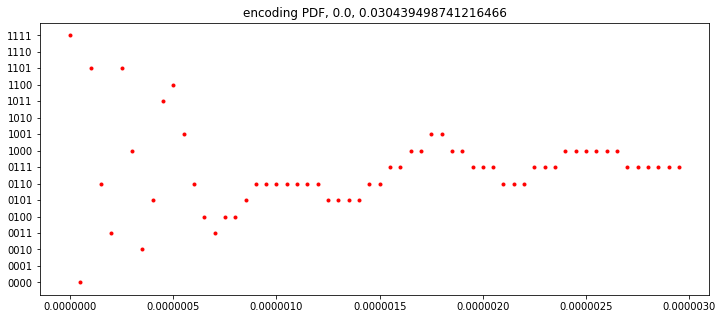

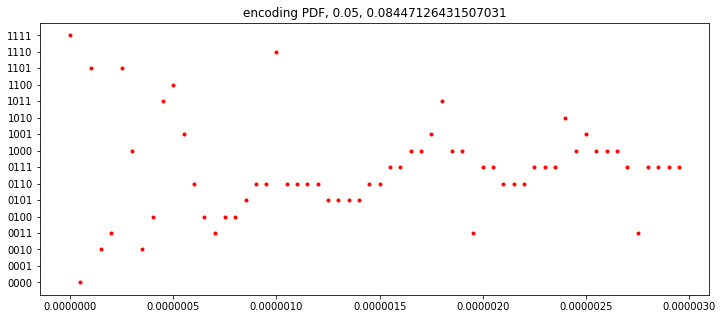

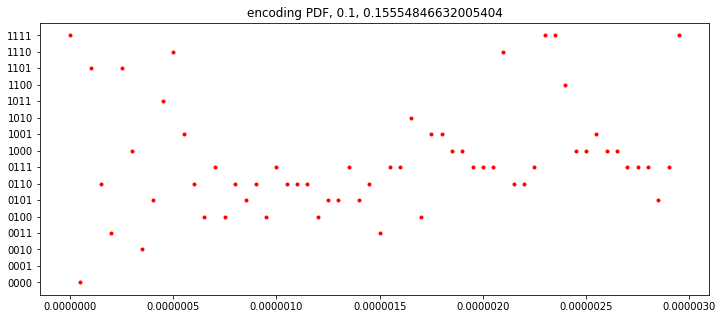

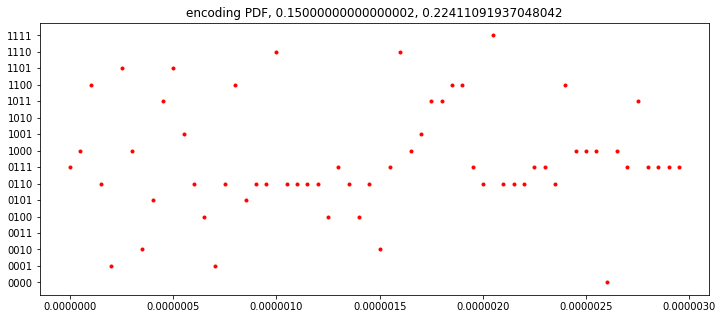

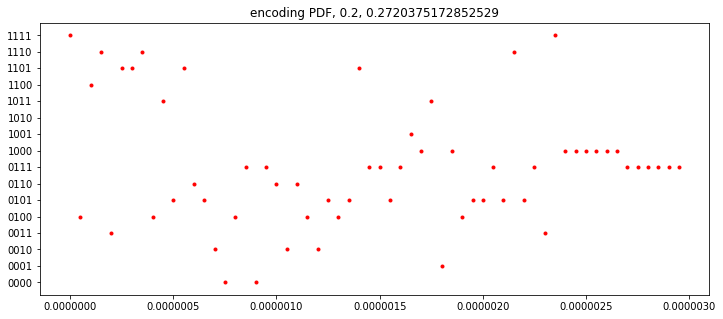

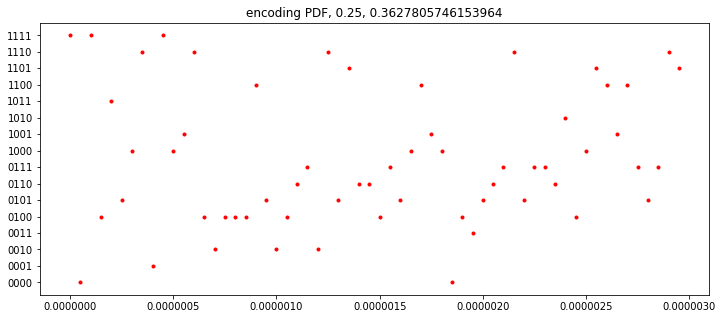

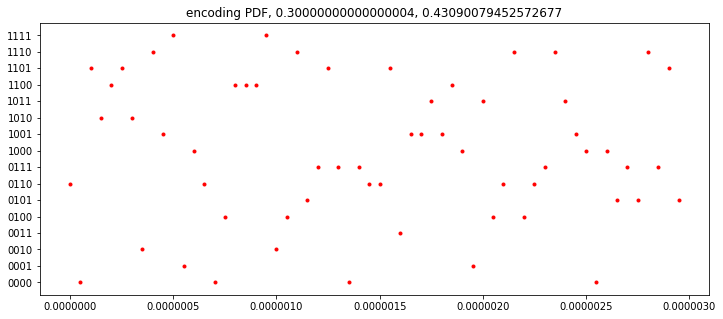

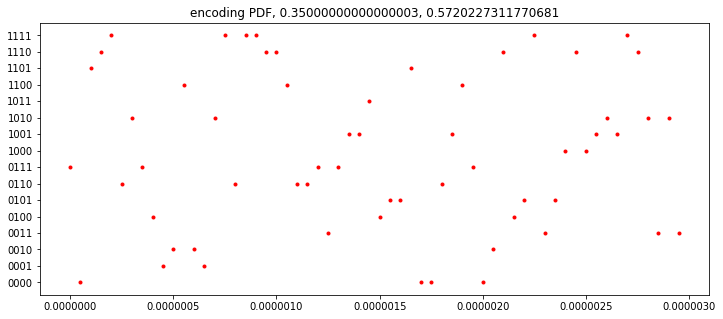

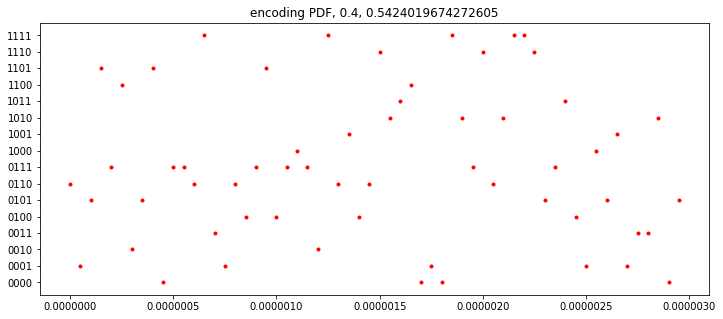

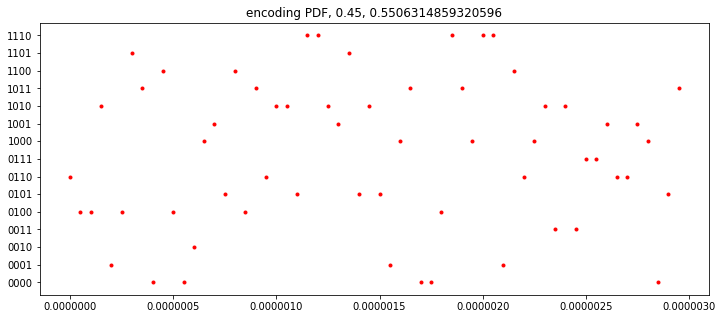

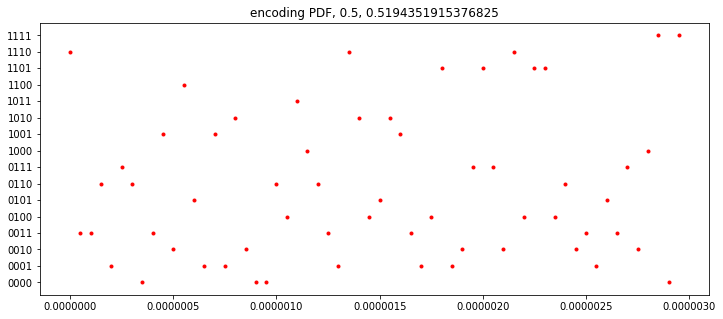

In [25]:
Q = 4
Pb = np.arange(0,0.55,0.05)
total_err = []
et = []

for pb in Pb:
    et += [pb]
    qy, qt = quantize_encoding(Q, s_y, pb)
    
    avr_error = quant_error(s_y, qy)
    total_err += [avr_error]
    
    ent = bitation(Q)
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1,1,1, title='encoding PDF, ' + str(pb) + ', ' + str(avr_error))
    ax.set_yticks(qt)
    ax.set_yticklabels(ent)
    ax.plot(s_t,qy,'r.')

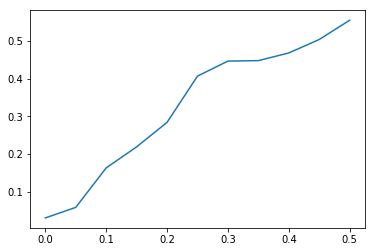

In [18]:
plt.plot(et, total_err)

In [19]:
def dec2bin(n, b):
    if n < 1:
        return b
    else:
        b += str(n % 2)
        v = int(n / 2)
        print (b)
        dec2bin(v, b)

In [20]:
n = 5
b = ''
a = dec2bin(n,b)
a

1
10
101


In [21]:
bin(2)

'0b10'